In [4]:
import pandas as pd 

In [ ]:
# Read the dummy data 
df = pd.read_csv("/Users/Your File Path/dummy_aws_cost_data.csv")
# Preview Data
df.head()

,UsageDate,Service,Region,UsageType,Cost
0,2025-03-13,Amazon EC2,us-east-1,GB-Seconds,9.30
1,2025-03-13,Amazon S3,us-west-2,Multi-AZ-Storage,6.27
2,2025-03-13,AWS Lambda,eu-central-1,BoxUsage:t2.micro,6.57
3,2025-03-13,Amazon RDS,us-east-1,BoxUsage:t2.micro,7.65
4,2025-03-14,Amazon EC2,us-west-2,Requests-Tier1,12.53


In [6]:
# Convert UsageData to datetime 
df['UsageDate'] = pd.to_datetime(df['UsageDate'], errors='coerce')


In [7]:
df['UsageDate'] = pd.to_datetime(df['UsageDate'], errors='coerce')


In [8]:
# Define yesterday and the 7 days before that
today = df['UsageDate'].max()
yesterday = today - pd.Timedelta(days=1)
last_7_days = yesterday - pd.Timedelta(days=6)

In [9]:
# Filter for last 7 days and yesterday only
df_7 = df[(df['UsageDate'] >= last_7_days) & (df['UsageDate'] <= yesterday)]
df_yesterday = df[df['UsageDate'] == yesterday]

In [10]:
# Group by Service
avg_7 = df_7.groupby('Service')['Cost'].mean()
cost_yesterday = df_yesterday.groupby('Service')['Cost'].sum()

# Calculate spike ratio
spikes = (cost_yesterday / avg_7) > 1.5  # you can adjust the threshold %

In [11]:
import matplotlib.pyplot as plt

In [12]:
# Create the cost comparison chart
cost_comparison = pd.DataFrame({
    '7-Day Avg': avg_7,
    'Yesterday': cost_yesterday
})

In [13]:
from io import BytesIO
import matplotlib.pyplot as plt
import requests




In [14]:
# Plot and save
plt.figure(figsize=(10, 6))
cost_comparison.plot(kind='bar')
plt.title("AWS Cost Comparison: 7-Day Avg vs Yesterday")
plt.ylabel("Cost ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cost_comparison_chart.png")
plt.close()

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Rebuild the plot
cost_comparison = pd.DataFrame({
    '7-Day Avg': avg_7,
    'Yesterday': cost_yesterday
})

# Plot and save
plt.figure(figsize=(10, 6))
cost_comparison.plot(kind='bar')
plt.title("AWS Cost Comparison: 7-Day Avg vs Yesterday")
plt.ylabel("Cost ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cost_comparison_chart.png")
plt.close()

<Figure size 1000x600 with 0 Axes>

In [16]:
import requests
from io import BytesIO

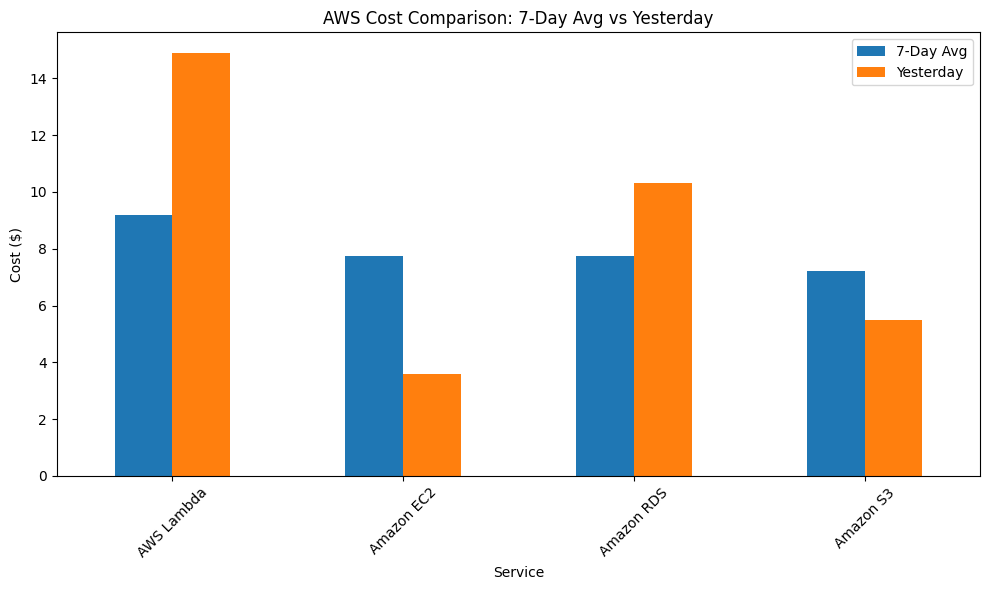

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
cost_comparison.plot(kind='bar', ax=ax)
plt.title("AWS Cost Comparison: 7-Day Avg vs Yesterday")
plt.ylabel("Cost ($)")
plt.xticks(rotation=45)
plt.tight_layout()

In [18]:
import matplotlib.pyplot as plt
from io import BytesIO

In [19]:
# Save chart to memory (not to file)
buffer = BytesIO()
plt.savefig(buffer, format='png')
plt.close()
buffer.seek(0)

0

In [20]:
from dotenv import load_dotenv
import os


In [22]:
# Load token from .env
load_dotenv(dotenv_path="Enter Path Here")  # ← your full path
slack_token = os.getenv("SLACK_TOKEN")

In [ ]:
# Configure to Slack
slack_token = os.getenv("SLACK_TOKEN")  # from .env
channel = "#MySlackChannelName"

In [ ]:
#Confirm Token is connected 
print("Token:", slack_token[:12])  # Only show the first part for safety


In [24]:
# Print services with spikes 
print("🚨 Services with cost spikes:")
if spikes.any():
    print(spikes[spikes].index.tolist())
else:
    print("No significant spikes today.")


🚨 Services with cost spikes:
['AWS Lambda']


In [ ]:
# Detailed notification Message 
import requests

webhook_url = "https://hooks.slack.com/services/your/full/webhook/url"  #Add Your Webhook 
message = {
    "text": "🚨 AWS Cost Spike Alert: AWS Lambda cost jumped 3.2x yesterday!"
}

requests.post(webhook_url, json=message)
